In [1]:
import sys
sys.path.insert(0, "../")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mcfa import (mcfa, mpl_utils)

%matplotlib inline

In [2]:
# Load the Iris data.
X = load_iris().data

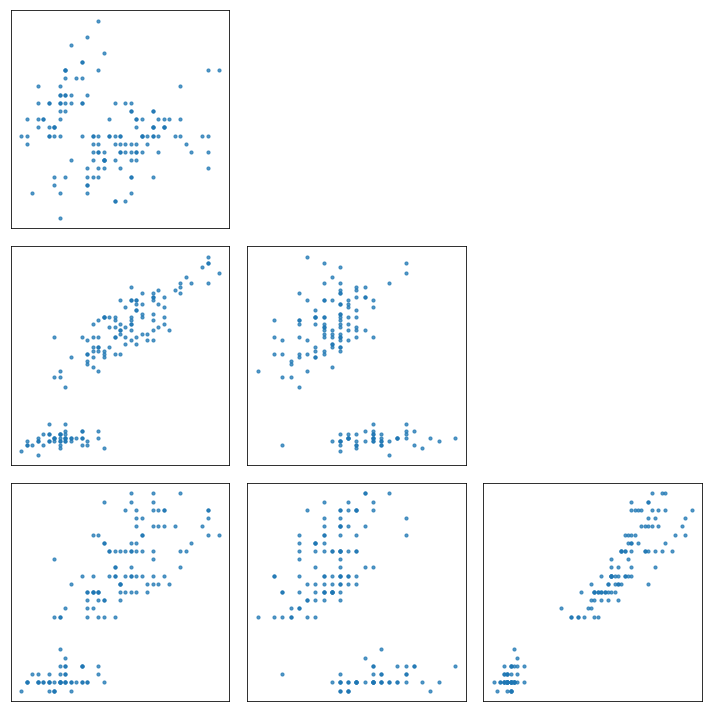

In [3]:
# Plot the data as a corner plot.
fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10))

In [4]:
model = mcfa.MCFA(n_components=3, n_latent_factors=3)
model.fit(X)

In [5]:
for parameter_name, value in dict(zip(model.parameter_names, model.theta_)).items():
    print("{}: {}\n{}".format(parameter_name, value.shape, value))

pi: (3,)
[0.33333333 0.3629608  0.30370587]
A: (4, 3)
[[-0.62212797 -0.27949059  0.5491855 ]
 [-0.5128112  -0.53810842 -0.40886664]
 [-0.45018033  0.71271387  0.25014925]
 [-0.36518695  0.35264859 -0.69490393]]
xi: (3, 3)
[[-5.70878588 -8.93061675 -7.60714862]
 [-2.10770043  1.19548317  0.3155135 ]
 [ 1.57925526  2.43483746  2.28794248]]
omega: (3, 3, 3)
[[[ 0.14538313  0.57811628  0.42079802]
  [ 0.07664748 -0.12954415 -0.0622658 ]
  [-0.01017949 -0.18282976 -0.11402189]]

 [[ 0.07664748 -0.12954415 -0.0622658 ]
  [ 0.0506597   0.054188    0.01339608]
  [-0.01225018  0.04646063  0.01600382]]

 [[-0.01017949 -0.18282976 -0.11402189]
  [-0.01225018  0.04646063  0.01600382]
  [ 0.00609423  0.16574717  0.04871564]]]
psi: (4,)
[0.04770523 0.0430234  0.02836892 0.00145949]


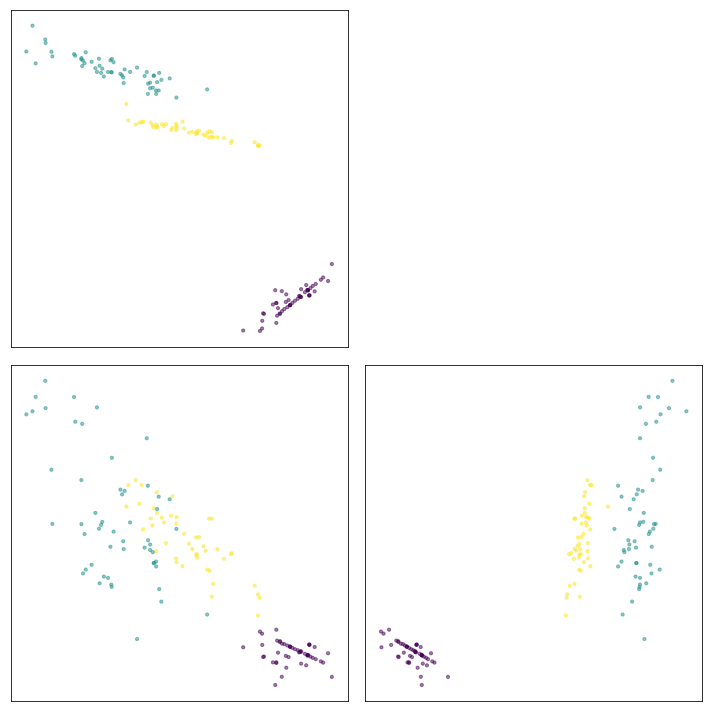

In [6]:
# Plot the estimated posterior factor scores.
#fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10))
v, v_cluster, v_mean = model.factor_scores(X)

# Associations
hard_associations = np.argmax(model.tau_, axis=1)

fig = mpl_utils.corner_scatter(v_mean, c=hard_associations, figsize=(10, 10), s=10)

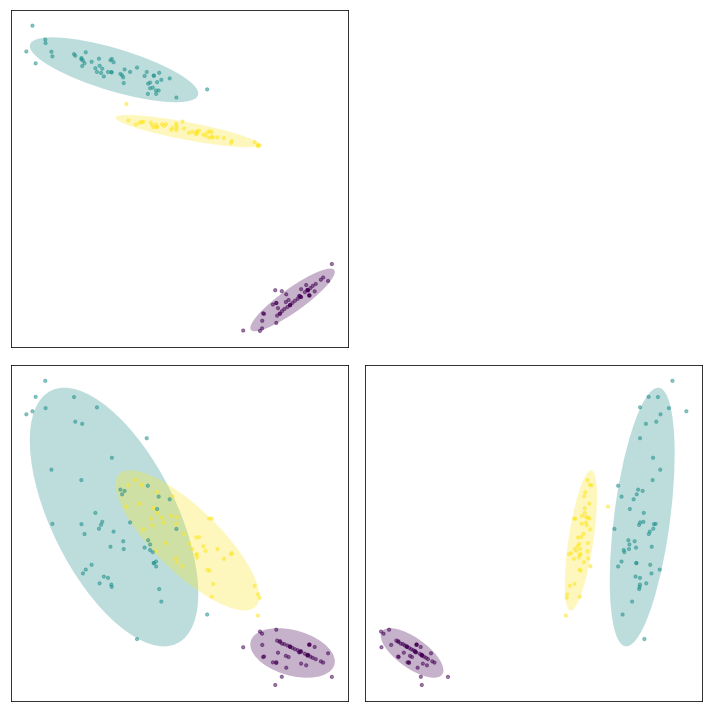

In [7]:
fig = model.plot_latent_space(X, s=10, figsize=(10, 10))

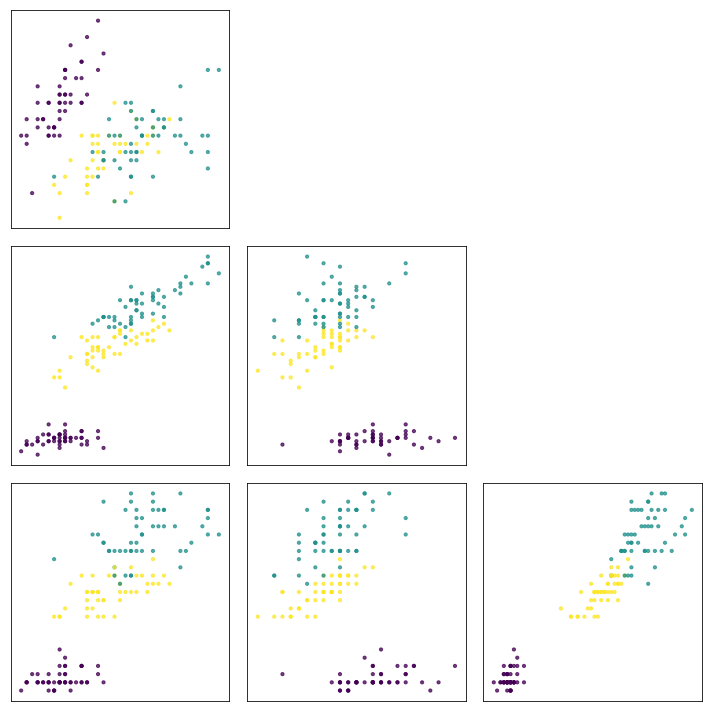

In [9]:
# Plot the clustering in data space.
fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10), c=hard_associations)

(4, 3)

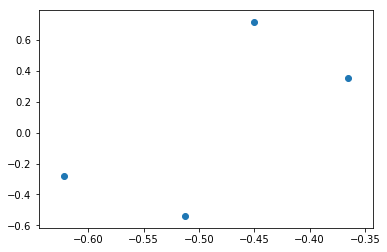

In [10]:
# Plot the factor loads.
A = model.theta_[model.parameter_names.index("A")]
fig, ax = plt.subplots()
ax.scatter(A.T[0], A.T[1])
model.theta_[1].shape


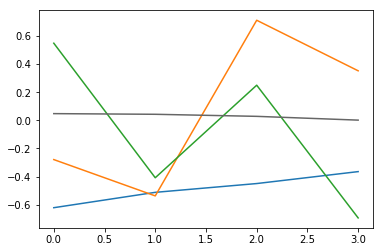

In [11]:
fig, ax = plt.subplots()
for i in range(model.n_latent_factors):
    ax.plot(A.T[i])

psi = model.theta_[model.parameter_names.index("psi")]
ax.plot(psi, c="#666666")